### Alumno: Julián Comandé

## 75.06/95.58 Organización de Datos - 1er cuatrimestre 2020

### Finger 1: Real or Not?

Enunciado completo: https://docs.google.com/document/d/1du4Q0Wpbsw7AEaweBq9xm_eBrPB9bWhxQPEK-WLkbPI/edit?usp=sharing

Se pide:

1. Sobre el set de datos del TP, analizar la relación que existe entre la longitud de los tweets, y la veracidad de los mismos. Para esto se espera que analicen las longitudes de los distintos tweets, long máxima, mínima, promedio, y si existe alguna relación entre estos valores y el target (que indica si la información provista en el tweet es real o no).
2. Realizar una visualización que permita comunicar los resultados del punto 1.
___

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_folder = './kaggle_data/'
data_file = 'train.csv'

tweets = pd.read_csv(data_folder + data_file, usecols=['id', 'text', 'target'], dtype={'target':'bool'})

tweets.tail()

,id,text,target
7608,10869,Two giant cranes holding a bridge collapse int...,True
7609,10870,@aria_ahrary @TheTawniest The out of control w...,True
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True
7611,10872,Police investigating after an e-bike collided ...,True
7612,10873,The Latest: More Homes Razed by Northern Calif...,True


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
id        7613 non-null int64
text      7613 non-null object
target    7613 non-null bool
dtypes: bool(1), int64(1), object(1)
memory usage: 126.5+ KB


**Observación:** No hay valores nulos en id, text o target, que son las columnas que nos interesan en este análisis

In [4]:
tweets['target'].value_counts()

False    4342
True     3271
Name: target, dtype: int64

**Observación:** Hay buena cantidad y balance de ambos valores de target, por lo que no sería un problema el tamaño de las muestras (De Moivre).

In [5]:
# Obtenemos medidas de longitudes
tweets['length'] = tweets['text'].str.len()

In [6]:
# Separamos tweets sobre desastres reales vs. los que no
tweets_truedisaster = tweets.loc[tweets['target'] == True,:]
tweets_notadisaster = tweets.loc[tweets['target'] == False,:]

In [7]:
#este código siguiente es para ver los describe() uno al lado del otro para facilitar la comparación.
tweets_stats = pd.DataFrame({ \
                     'tweets_total': tweets['length'].describe(), \
                     'tweets_truedisaster': tweets_truedisaster['length'].describe(), \
                     'tweets_notadisaster': tweets_notadisaster['length'].describe() })

tweets_stats=tweets_stats.round(decimals=1)

tweets_stats

,tweets_total,tweets_truedisaster,tweets_notadisaster
count,7613.0,3271.0,4342.0
mean,101.0,108.1,95.7
std,33.8,29.3,35.9
min,7.0,14.0,7.0
25%,78.0,88.0,68.0
50%,107.0,115.0,101.0
75%,133.0,136.0,130.0
max,157.0,151.0,157.0


**Observación:** Según vemos en estos cálculos, aquellos tweets sobre desastres tienden a ser un poco más largos.

Text(0.5, 0, 'Tweet length')

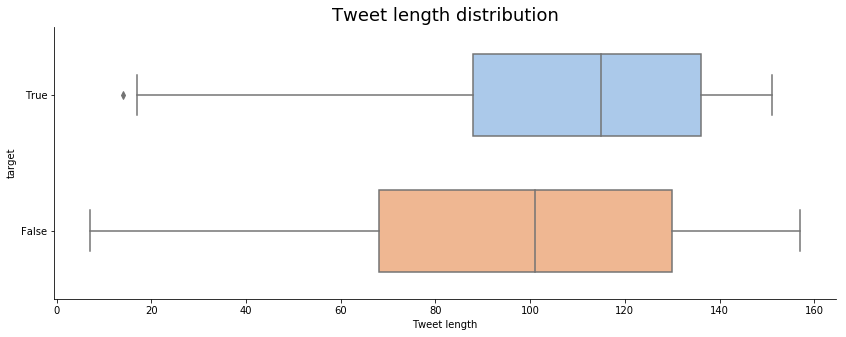

In [8]:
plt.figure(figsize=(14, 5))

ax = sns.boxplot(x=tweets['length'], y=tweets['target'], order=[True, False], orient="h", width=0.6, palette="pastel")

sns.despine()
plt.title('Tweet length distribution', fontsize=18)
plt.xlabel('Tweet length')

---
*Las siguientes visualizaciones son otros intentos de graficar el punto 1. De todas maneras creo que el BoxPlot es el que más ejemplifica la observación.*

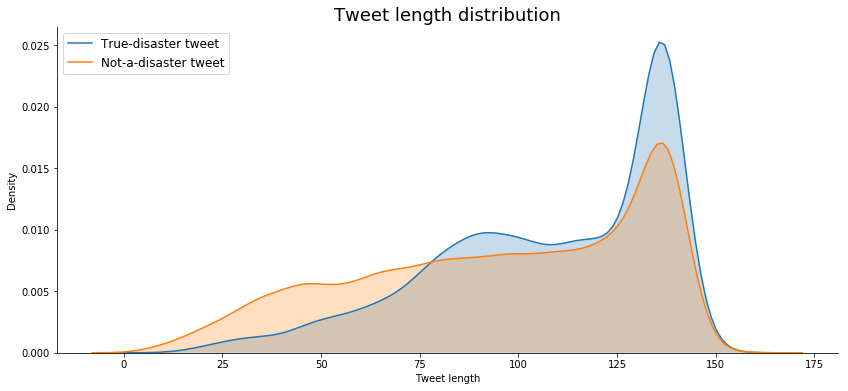

In [9]:
plt.figure(figsize=(14, 6))

# Default bandwith
#sns.kdeplot(tweets_truedisaster['length'], label='True disaster tweet', shade= True)
#sns.kdeplot(tweets_notadisaster['length'], label='Not-a-disaster tweet', shade= True)

# 'Custom' bandwith
plot_bandwith = 5
sns.kdeplot(tweets_truedisaster['length'], bw=plot_bandwith, label='True-disaster tweet', shade= True)
sns.kdeplot(tweets_notadisaster['length'], bw=plot_bandwith, label='Not-a-disaster tweet', shade= True)
    
# Plot formatting
sns.despine()
plt.title('Tweet length distribution', fontsize=18)
plt.xlabel('Tweet length')
plt.ylabel('Density')
plt.legend(fontsize=12, loc='upper left')

___
Esta visualización todavía necesita trabajo... No puedo juntar ambas mitades.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


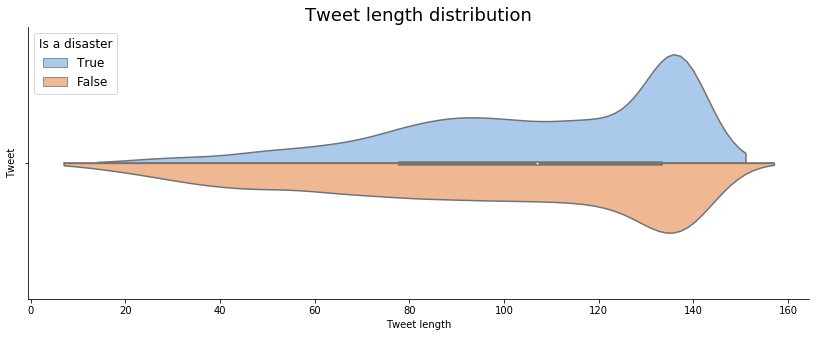

In [10]:
plt.figure(figsize=(14, 5))

ax = sns.violinplot(data=tweets, x='length', y=['Is a disaster']*len(tweets), hue='target',
                    orient="h", split=True, cut=0, legend='Full', hue_order=[True,False], palette='pastel')

sns.despine()
plt.title('Tweet length distribution', fontsize=18)
plt.xlabel('Tweet length')
ax.set(yticklabels=[])
plt.ylabel('Tweet')
plt.legend(title='Is a disaster', title_fontsize=12, fontsize=12, loc='upper left')
